# Customer Segmentation with RFM and Clustering

## Introduction
Customer segmentation is a key marketing strategy that helps businesses understand and target different groups of customers more effectively.  
In this notebook, we will:
- Apply the **RFM (Recency, Frequency, Monetary)** concept to e-commerce data.
- Use **K-Means clustering** to group customers based on purchasing behavior.
- Visualize the results to gain actionable business insights.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [82]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Cleaning
We remove unnecessary columns and handle missing values.

In [83]:
df.drop('Description', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [87]:
df.dropna(subset=['CustomerID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ MB


## Convert Dates
We convert the InvoiceDate column to datetime format for time-based calculations.

In [88]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.8+ MB


## Create Monetary Value Features
We calculate Total Price per transaction and Total Spent per customer.

In [90]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [91]:
df['TotalSpent'] = df.groupby('CustomerID')['TotalPrice'].transform('sum')
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalSpent
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5288.63
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5288.63
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63


## Calculate Recency and Frequency
We compute:

Recency: Days since last purchase (will be derived from LatestPurchaseDate)

Frequency: Number of purchases

In [92]:
df['LatestPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalSpent,LatestPurchaseDate
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5288.63,2011-02-10 14:38:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63,2011-02-10 14:38:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5288.63,2011-02-10 14:38:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63,2011-02-10 14:38:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63,2011-02-10 14:38:00


In [93]:
df['Frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalSpent,LatestPurchaseDate,Frequency
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5288.63,2011-02-10 14:38:00,312
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63,2011-02-10 14:38:00,312
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5288.63,2011-02-10 14:38:00,312
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63,2011-02-10 14:38:00,312
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5288.63,2011-02-10 14:38:00,312


## Keep Only RFM-Related Columns
We filter down to the unique customer records containing RFM metrics.

In [94]:
df = df[['CustomerID', 'TotalSpent', 'LatestPurchaseDate', 'Frequency']].drop_duplicates()
df.head()

,CustomerID,TotalSpent,LatestPurchaseDate,Frequency
0,17850.0,5288.63,2011-02-10 14:38:00,312
9,13047.0,3079.10,2011-11-08 12:10:00,196
26,12583.0,7187.34,2011-12-07 08:07:00,251
46,13748.0,948.25,2011-09-05 09:45:00,28
65,15100.0,635.10,2011-01-13 17:09:00,6


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 0 to 541768
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          4372 non-null   float64       
 1   TotalSpent          4372 non-null   float64       
 2   LatestPurchaseDate  4372 non-null   datetime64[ns]
 3   Frequency           4372 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 170.8 KB


In [96]:
df.nunique()

CustomerID            4372
TotalSpent            4288
LatestPurchaseDate    4239
Frequency              474
dtype: int64

## Transform Recency into Days
We convert LatestPurchaseDate into number of days since the earliest purchase date.

In [97]:
df['LatestPurchaseDate'] = (df['LatestPurchaseDate'] - df['LatestPurchaseDate'].min()).dt.days
df.head()

,CustomerID,TotalSpent,LatestPurchaseDate,Frequency
0,17850.0,5288.63,71,312
9,13047.0,3079.10,342,196
26,12583.0,7187.34,370,251
46,13748.0,948.25,277,28
65,15100.0,635.10,43,6


## Visualize Customer Distribution
We use a 3D scatter plot to visualize the distribution of customers based on RFM metrics.

In [99]:
fig = px.scatter_3d(df.iloc[:, 1:], x='TotalSpent', y='LatestPurchaseDate', z='Frequency',
                    title='Customer Segmentation')
fig.show()

## Find Optimal Number of Clusters (Elbow Method)
We use the Elbow Method to determine the best number of clusters for K-Means.

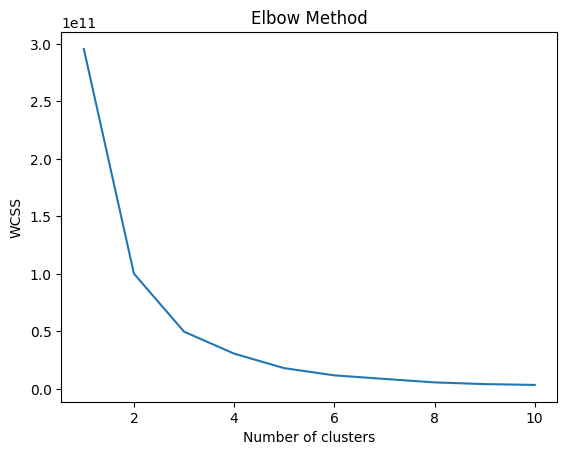

In [101]:
from sklearn.cluster import KMeans

X = df.iloc[:, 1:].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Apply K-Means Clustering
We scale the data for better clustering performance and then fit K-Means with 4 clusters.

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
fig = px.scatter_3d(df.iloc[:, 1:], x='TotalSpent', y='LatestPurchaseDate', z='Frequency',
                    color='Cluster',
                    title='Customer Segmentation with Clusters')
fig.show()

## 2D Cluster Visualizations
We create multiple 2D scatter plots for better interpretation.

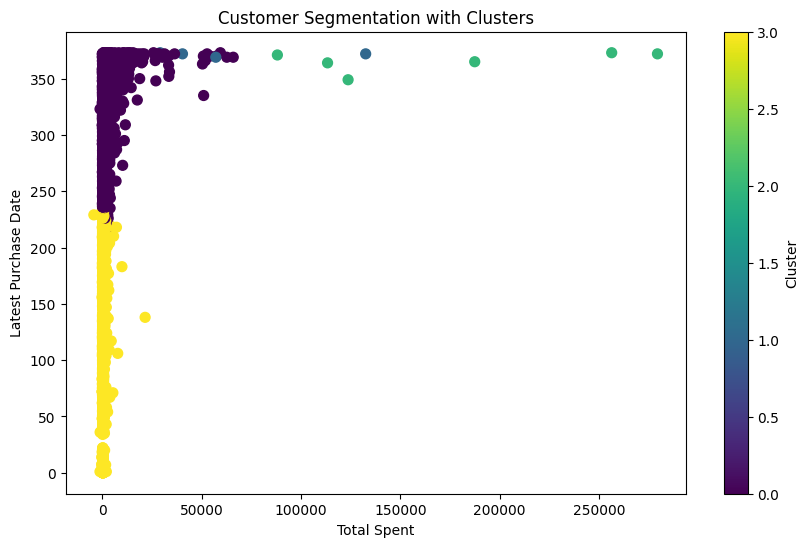

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalSpent'], df['LatestPurchaseDate'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation with Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Latest Purchase Date')
plt.colorbar(label='Cluster')
plt.show()

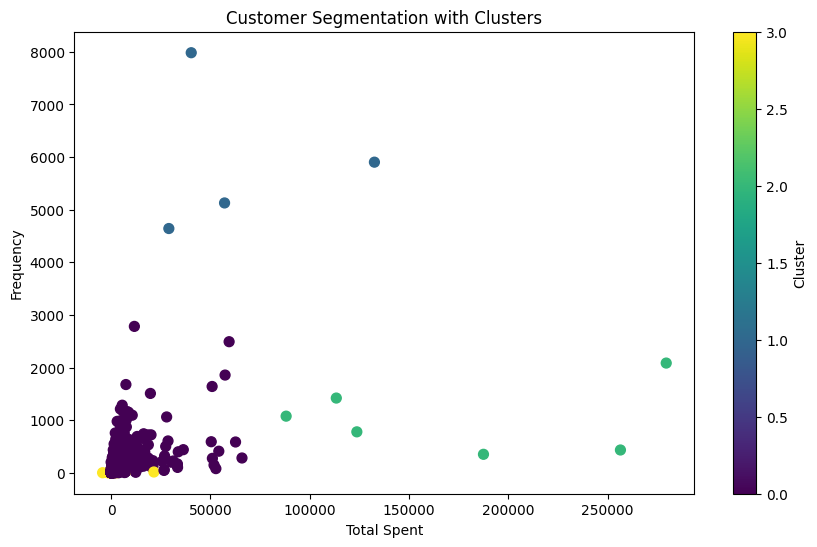

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalSpent'], df['Frequency'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation with Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.colorbar(label='Cluster')
plt.show()

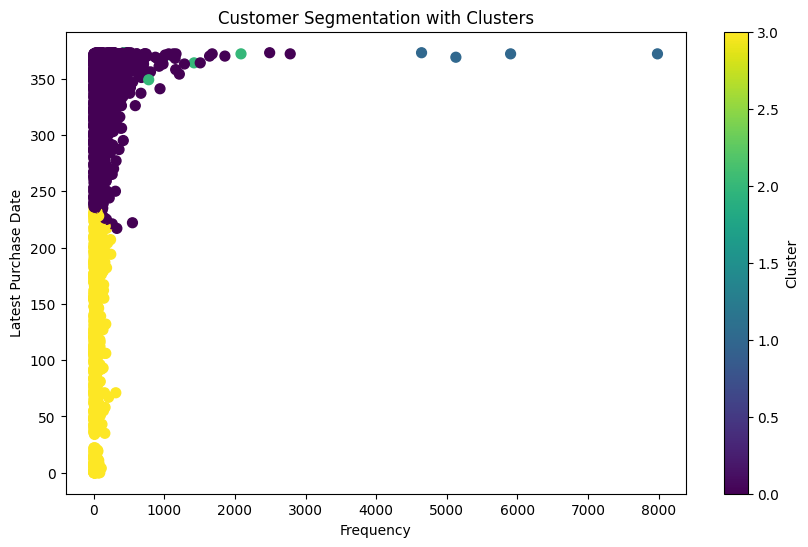

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Frequency'], df['LatestPurchaseDate'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation with Clusters')
plt.xlabel('Frequency')
plt.ylabel('Latest Purchase Date')
plt.colorbar(label='Cluster')
plt.show()

In [108]:
df.head()

,CustomerID,TotalSpent,LatestPurchaseDate,Frequency,Cluster
0,17850.0,5288.63,71,312,3
9,13047.0,3079.10,342,196,0
26,12583.0,7187.34,370,251,0
46,13748.0,948.25,277,28,0
65,15100.0,635.10,43,6,3


## Business Insights from Clusters

We assigned a score from **1 to 4** for each RFM metric:
- **R (Recency)**: Higher score = purchased more recently.
- **F (Frequency)**: Higher score = purchases more often.
- **M (Monetary)**: Higher score = spends more.

| Cluster | R | F | M | Interpretation |
|---------|---|---|---|----------------|
| **0** | 2 | 2 | 2 | **Mid-range customers** – Moderate recency, frequency, and spending. They are steady buyers but not top performers. |
| **1** | 4 | 4 | 3 | **Champions** – Recent and frequent buyers with high spending. These are your most valuable customers and should be nurtured with loyalty programs. |
| **2** | 3 | 3 | 4 | **Big Spenders** – Spend the most but are slightly less recent/frequent than champions. Special high-value offers can retain them. |
| **3** | 1 | 1 | 1 | **At Risk / Lost** – Least recent, least frequent, and lowest spending. They may be inactive and require reactivation campaigns. |


### Recommended Actions
- **Cluster 1 – Champions:** Reward with exclusive offers, early product access, and VIP programs to retain them.
- **Cluster 2 – Big Spenders:** Target with high-end promotions and personalized upselling opportunities.
- **Cluster 0 – Mid-range Customers:** Encourage them to buy more often via targeted promotions.
- **Cluster 3 – At Risk / Lost:** Send win-back campaigns, discounts, or reminders to re-engage.
